Importing Libraries

In [8]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [9]:
file_path = "../../data/processed/train_data.csv"
df = pd.read_csv(file_path)
X=df.drop('target',axis=1)
y=df['target']
df2=pd.read_csv('../../data/processed/test_data.csv')
X_test=df2.drop('target',axis=1)
y_test=df2['target']

filtering the features with Pearson Correlation

In [10]:
#calculate the correlation between features 

def pearson_correlation(X,y):
#calculate the mean 
    mean_X=sum(X)/len(X)
    mean_y=sum(y)/len(y)
    #calculate the covariance
    covariance=sum([(X[i]-mean_X)*(y[i]-mean_y) for i in range(len(X))])
    #calculate the standard deviation
    std_X=sum([(X[i]-mean_X)**2 for i in range(len(X))])**0.5
    std_y=sum([(y[i]-mean_y)**2 for i in range(len(y))])**0.5
    if std_X==0 or std_y==0:
        return 0
    #calculate the correlation
    correlation=covariance/(std_X*std_y)
    return correlation

In [11]:
def filter_by_pearson(data, threshold, threshold2):
    columns = data.columns 
    target = data['target']  
    #Filter columns that are too strongly correlated with the target
    columns_to_keep = set(columns)
    for column in columns:
        if column != 'target': 
            correlation_matrix = pearson_correlation(data[column], target) 
            # If the correlation is too strong, add the column to the list to remove
            if abs(correlation_matrix) <= threshold: 
                columns_to_keep.discard(column)


    #Compare columns with each other and remove the less correlated one with the target
    filtered_columns = list(columns_to_keep) 

    for i, column in enumerate(filtered_columns):
        for j in range(i + 1, len(filtered_columns)):  
            column2 = filtered_columns[j]

            # Calculate the correlation between the two columns
            correlation_matrix2 = pearson_correlation(data[column], data[column2])
            if  abs(correlation_matrix2) > threshold2: 
                # Calculate the correlation of both columns with the target
                correlation_matrix3 = pearson_correlation(data[column], target)
                correlation_matrix4 = pearson_correlation(data[column2], target)

                # Compare which column is more correlated with the target and keep it
                if abs(correlation_matrix3) > abs(correlation_matrix4):
                    columns_to_keep.discard(column2)
                else:
                    columns_to_keep.discard(column)

    indices_to_keep = [data.columns.get_loc(col) for col in columns_to_keep if col != 'target']
    return indices_to_keep



In [12]:
filter_by_pearson(df,0.3,0.8)

[743,
 579,
 744,
 399,
 427,
 404,
 125,
 137,
 133,
 109,
 620,
 24,
 2,
 135,
 138,
 132,
 752,
 25,
 58]

Visualisation of features before and after filtering

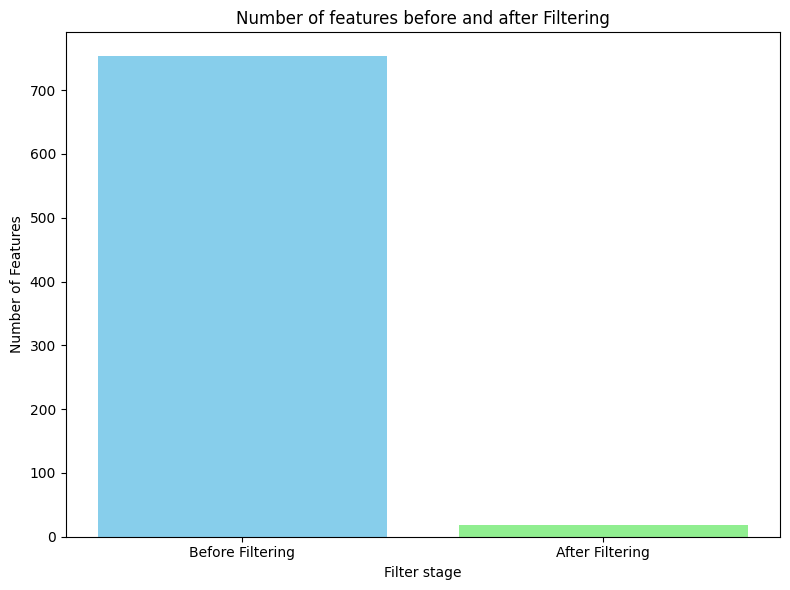

In [13]:
X = df.drop(columns=['target'])
plt.figure(figsize=(8,6))
plt.title("Number of features before and after Filtering")
plt.bar(['Before Filtering','After Filtering'],[len(X.columns),len(filter_by_pearson(df,0.3,0.8))],color=['skyblue', 'lightgreen'])
plt.xlabel("Filter stage")
plt.ylabel("Number of Features")
plt.tight_layout()
plt.show()

Embedded methode with XGBoost for feature selection

Importing Libraries

In [14]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [15]:
xgb_model = xgb.XGBClassifier(random_state=42,n_estimators=500,learning_rate=0.1,objective='binary:logistic',eval_metric='logloss') # 0.85
xgb_model.fit(X,y)
# Get most importante features 
feature_importances =xgb_model.feature_importances_
threshold = 0.01
indices_afer_embeded = np.where(feature_importances > threshold)[0]
print(f"Number of features selected using Embeded Method : {len(indices_afer_embeded)}")
# Calc Accuracy
preds = xgb_model.predict(X_test)
print(f"accuracy score : {accuracy_score(y_test,preds)}") 

Number of features selected using Embeded Method : 20
accuracy score : 0.950354609929078


Visualisation of the number of features before and after the embedding method

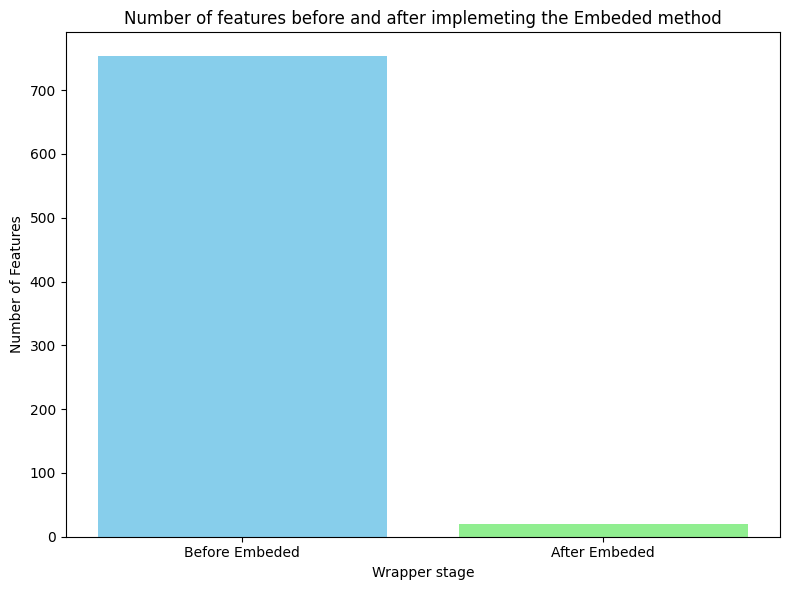

In [16]:
plt.figure(figsize=(8,6))
plt.title("Number of features before and after implemeting the Embeded method")
plt.bar(['Before Embeded','After Embeded'],[len(X.columns),len(indices_afer_embeded)],color=['skyblue', 'lightgreen'])
plt.xlabel("Wrapper stage")
plt.ylabel("Number of Features")
plt.tight_layout()
plt.show()